# Simple Classifiers Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os

from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

plt.style.use('seaborn-deep')

%matplotlib inline
# Eliminates output truncation
pd.options.display.max_columns = 999
# Use seaborn style defaults and set the default figure size
pd.set_option('display.max_rows', None)


In [2]:
os.chdir('C:\\Users\orion.darley\\Desktop\\ML HW\\')
cwd = os.getcwd()

### Load

In [3]:
url = 'https://raw.githubusercontent.com/OrionDarley/Public-Other/master/News%20Story%20NLP%20Classifier/train.csv'
train = pd.read_csv(url, error_bad_lines=False).rename(columns={'Content': 'content', 'Label': 'label'})
url = 'https://raw.githubusercontent.com/OrionDarley/Public-Other/master/News%20Story%20NLP%20Classifier/valid.csv'
valid = pd.read_csv(url, error_bad_lines=False)

### Data Prep & CV / TFIDF Vectorization and Matrix

In [4]:
y_train = train.label.replace({'Classifieds': 1, 'News': 2, 'Features': 3, 'Opinion': 4})
y_valid = valid.label.replace({'Classifieds': 1, 'News': 2, 'Features': 3, 'Opinion': 4})
x_train = train.content
x_valid = valid.content

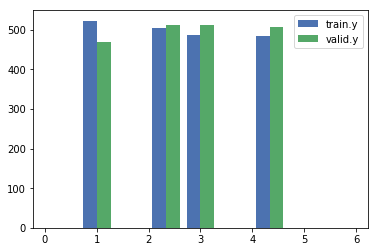

In [5]:
bins = np.linspace(0, 6, 10)

plt.hist([y_train, y_valid], bins, label=['train.y', 'valid.y'])
plt.legend(loc='upper right')
plt.show()

In [6]:
#Fit models on tfidf matrix
wpt = WordPunctTokenizer()
cv = CountVectorizer(tokenizer=wpt.tokenize, stop_words='english', ngram_range=(1,3))

cv.fit(train.content.tolist() + valid.content.tolist())
train_cv = cv.transform(x_train)
valid_cv = cv.transform(x_valid)

tfidf = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1.0,smooth_idf=1.0,sublinear_tf=1.0,
            stop_words = 'english')

tfidf.fit(x_train.tolist() + x_valid.tolist())
train_tf = tfidf.transform(x_train)
valid_tf = tfidf.transform(x_valid)
print(train_tf.shape, valid_tf.shape)

(2000, 50198) (2000, 50198)


### ML Classifieres using TFIDF Matrix

In [7]:
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


#Creates confusion matrix
def Model(train_tf, y_train, valid_tf, y_valid, model):
  model.fit(train_tf, y_train)
  prediction = model.predict(valid_tf)
  print(classification_report(y_valid,prediction))

classifiers = [
    LogisticRegression(),
    MultinomialNB(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]

names = ["LogisticRegression", "MultinomialNB", "KNeighborsClassifier", "SVC",
         "NuSVC", "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier",
         "GradientBoostingClassifier"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


-------------------------------------------------
LogisticRegression
model ave weighted f1-score: 0.678
              precision    recall  f1-score   support

           1       0.63      0.70      0.66       470
           2       0.76      0.56      0.65       512
           3       0.59      0.58      0.59       511
           4       0.74      0.87      0.80       507

   micro avg       0.68      0.68      0.68      2000
   macro avg       0.68      0.68      0.67      2000
weighted avg       0.68      0.68      0.67      2000

-------------------------------------------------
MultinomialNB
model ave weighted f1-score: 0.668
              precision    recall  f1-score   support

           1       0.60      0.72      0.65       470
           2       0.75      0.56      0.64       512
           3       0.57      0.59      0.58       511
           4       0.79      0.80      0.79       507

   micro avg       0.67      0.67      0.67      2000
   macro avg       0.68      0.67   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-------------------------------------------------
SVC
model ave weighted f1-score: 0.235


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.23      1.00      0.38       470
           2       0.00      0.00      0.00       512
           3       0.00      0.00      0.00       511
           4       0.00      0.00      0.00       507

   micro avg       0.23      0.23      0.23      2000
   macro avg       0.06      0.25      0.10      2000
weighted avg       0.06      0.23      0.09      2000

-------------------------------------------------
NuSVC
model ave weighted f1-score: 0.620
              precision    recall  f1-score   support

           1       0.68      0.57      0.62       470
           2       0.88      0.37      0.52       512
           3       0.45      0.73      0.56       511
           4       0.72      0.81      0.77       507

   micro avg       0.62      0.62      0.62      2000
   macro avg       0.68      0.62      0.62      2000
weighted avg       0.69      0.62      0.61      2000

---------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------
RandomForestClassifier
model ave weighted f1-score: 0.584
              precision    recall  f1-score   support

           1       0.55      0.63      0.58       470
           2       0.62      0.61      0.61       512
           3       0.48      0.41      0.44       511
           4       0.75      0.77      0.76       507

   micro avg       0.60      0.60      0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000

-------------------------------------------------
AdaBoostClassifier
model ave weighted f1-score: 0.467
              precision    recall  f1-score   support

           1       0.45      0.44      0.45       470
           2       0.44      0.54      0.49       512
           3       0.30      0.33      0.31       511
           4       0.79      0.55      0.65       507

   micro avg       0.47      0.47      0.47      2000
   macro avg       0.50    

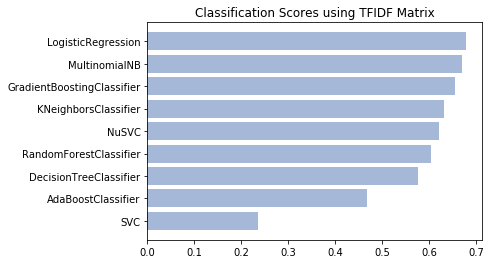

In [8]:
df = pd.DataFrame({'unnamed': [0]})
tfidfscores = pd.DataFrame()

for classifier, name in zip(classifiers, names):
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(train_tf, y_train)   
    #print(classifier)
    print('-------------------------------------------------')
    print(name)
    print("model ave weighted f1-score: %.3f" % pipe.score(valid_tf, y_valid))
    Model(train_tf, y_train, valid_tf, y_valid, classifier)
    df['classifier'] = name
    df['score'] = pipe.score(valid_tf, y_valid)
    tfidfscores = tfidfscores.append(df)

tfidfscores = tfidfscores.sort_values('score')
plt.barh(tfidfscores['classifier'], tfidfscores['score'], align='center', alpha=0.5)
plt.yticks(tfidfscores['classifier'])
plt.title('Classification Scores using TFIDF Matrix')

plt.show()

Logistic Legression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


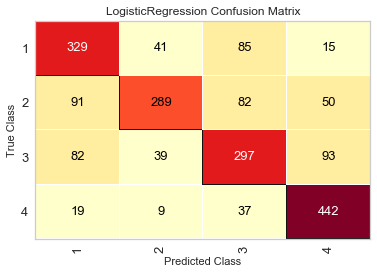

MultinomialNB


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


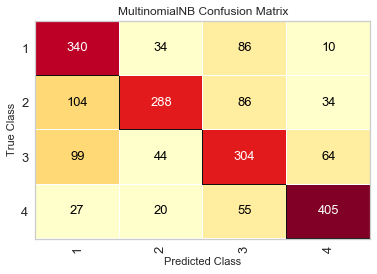

GradientBoostingClassifier


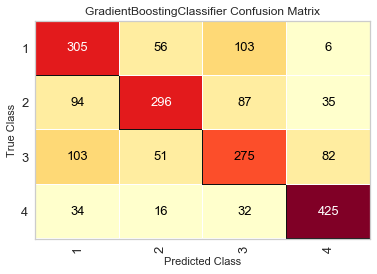

KNeighborsClassifier


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


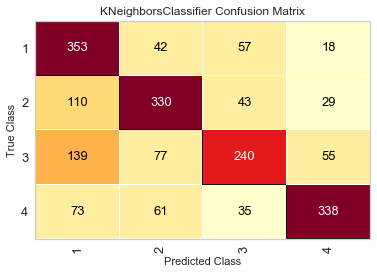

In [9]:
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve


estimators_dct = {"Logistic Legression": LogisticRegression(),
                "MultinomialNB" : MultinomialNB(),
                "GradientBoostingClassifier": GradientBoostingClassifier(),
                "KNeighborsClassifier": KNeighborsClassifier(3)}

# set up the figure size for the confusion matrices
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 15

def confusion_matrices(estimator_dict):

    for estimator in estimator_dict.keys():
        print(estimator)
        model = Pipeline([('estimator', estimator_dict[estimator])])
        model.fit(train_tf, y_train)
        cm = ConfusionMatrix(model, fontsize=13)
        cm.score(valid_tf, y_valid)
        cm.poof()
    
confusion_matrices(estimators_dct)